<a href="https://colab.research.google.com/github/AnasBakr/Ml-projects-/blob/main/Credit_Card_Fraud_Detection_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [ ]:
# importing the used librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
# retrieving the data set as pandas dataframe
data_set = pd.read_csv('/content/creditcard.csv')

In [ ]:
# getting the first several rows of the data set
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# getting the dimensions of the data set
data_set.shape

(25838, 31)

In [ ]:
# getting the the duplicated rows numbers
data_set.duplicated().sum()

100

In [ ]:
# getting the the empty rows numbers
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# removing all the duplicated rows from the data
data_set.drop_duplicates(inplace=True)

In [ ]:
#Here we remove the empty values
data_set.dropna(inplace=True)

In [ ]:
data_set.shape

(25737, 31)

In [ ]:
#Here are some statistical facts about our data set
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,...,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000
mean,19378.516416,-0.223470,0.164077,0.722882,0.227135,-0.193878,0.078329,-0.127936,0.027572,0.440365,...,-0.039675,-0.131233,-0.039978,0.011745,0.129045,0.024333,0.014909,0.004577,75.998250,0.003419
std,11645.467077,1.888240,1.553004,1.687217,1.435390,1.438146,1.324279,1.320199,1.335406,1.270521,...,0.807453,0.640431,0.539324,0.589994,0.436271,0.516986,0.391232,0.279755,220.044081,0.058375
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7740.000000,-0.948214,-0.408280,0.279871,-0.686700,-0.778981,-0.663457,-0.593896,-0.164304,-0.387398,...,-0.249201,-0.551530,-0.173811,-0.324405,-0.134039,-0.338656,-0.064947,-0.008807,6.130000,0.000000
50%,22677.000000,-0.266721,0.175797,0.863156,0.202238,-0.224248,-0.181916,-0.067707,0.029260,0.358779,...,-0.097962,-0.106210,-0.048942,0.063545,0.166833,-0.051768,0.007020,0.019998,18.980000,0.000000
75%,30217.000000,1.166616,0.815733,1.489349,1.106199,0.321217,0.463407,0.446595,0.286507,1.200396,...,0.072618,0.276798,0.075054,0.399227,0.410112,0.306405,0.091996,0.077029,67.960000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [ ]:
#Here we know the columns data type and check if it is numerical to procced
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25737 entries, 0 to 25836
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25737 non-null  int64  
 1   V1      25737 non-null  float64
 2   V2      25737 non-null  float64
 3   V3      25737 non-null  float64
 4   V4      25737 non-null  float64
 5   V5      25737 non-null  float64
 6   V6      25737 non-null  float64
 7   V7      25737 non-null  float64
 8   V8      25737 non-null  float64
 9   V9      25737 non-null  float64
 10  V10     25737 non-null  float64
 11  V11     25737 non-null  float64
 12  V12     25737 non-null  float64
 13  V13     25737 non-null  float64
 14  V14     25737 non-null  float64
 15  V15     25737 non-null  float64
 16  V16     25737 non-null  float64
 17  V17     25737 non-null  float64
 18  V18     25737 non-null  float64
 19  V19     25737 non-null  float64
 20  V20     25737 non-null  float64
 21  V21     25737 non-null  float64
 22

In [ ]:
# getting the mean of every feature with respect to the trageted classes
data_set.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,19383.466022,-0.194683,0.142764,0.767294,0.206533,-0.173864,0.08713,-0.099868,0.012737,0.452125,...,0.040979,-0.041662,-0.130373,-0.038912,0.012653,0.128298,0.02380,0.012022,0.004248,75.915868
1.0,17935.875000,-8.613716,6.376169,-12.221731,6.231847,-6.027247,-2.48708,-8.308784,4.351326,-2.987199,...,0.714069,0.539387,-0.381823,-0.350615,-0.252970,0.346695,0.17976,0.856336,0.100578,100.010000


In [ ]:
correlation = data_set.corr()

<Axes: >

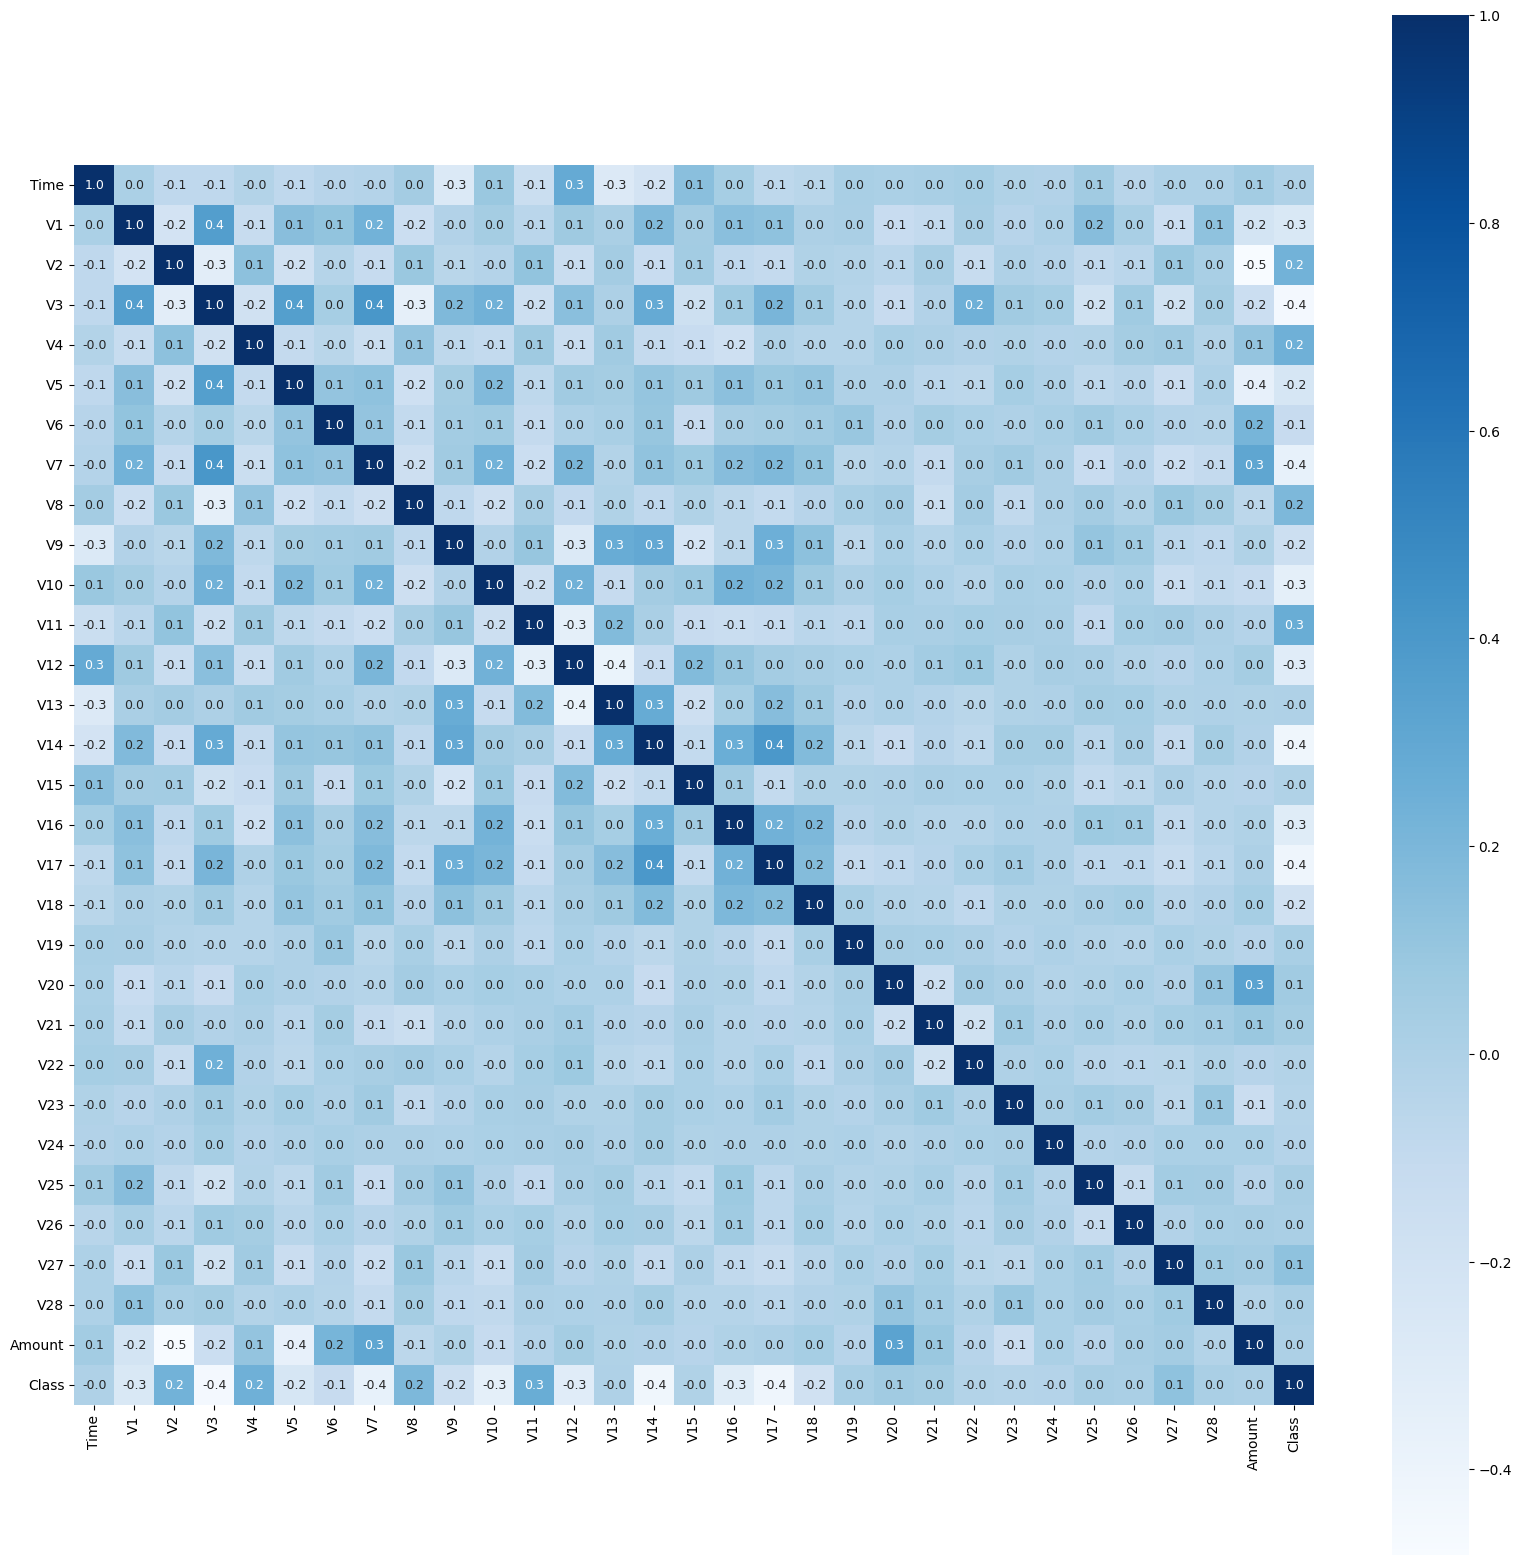

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation ,square=True ,cbar=True ,fmt='.1f' ,annot=True ,annot_kws={'size' : 9} ,cmap='Blues')

<Axes: xlabel='Class', ylabel='count'>

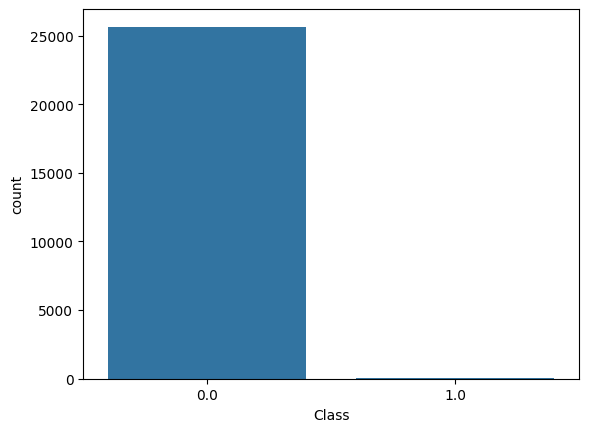

In [ ]:
# visualising the diffrence between the counts of the targeted class
sns.countplot(x='Class',data=data_set)

In [ ]:
#getting the count of every class in the data
data_set['Class'].value_counts()

0.0    25649
1.0       88
Name: Class, dtype: int64

In [ ]:
# separating the data and labels
X = data_set.drop(columns = 'Class', axis=1)
Y = data_set['Class']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7696
         1.0       0.70      0.73      0.72        26

    accuracy                           1.00      7722
   macro avg       0.85      0.86      0.86      7722
weighted avg       1.00      1.00      1.00      7722



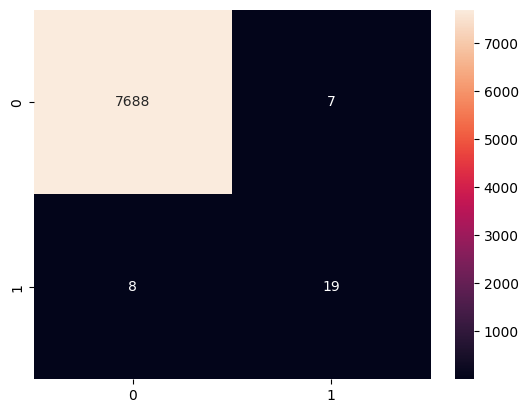

In [ ]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 ,stratify=Y ,random_state=0)
model.fit(x_train, y_train)
pre = model.predict(x_test)
accuracy = accuracy_score(pre, y_test)
recall = recall_score(pre, y_test)
f1 = f1_score(pre, y_test)
print(classification_report(y_test, pre))
cm = confusion_matrix(pre, y_test)
sns.heatmap(cm , annot=True ,fmt='g' )
plt.show()

because of the imbalance in the data set the accuracy is not a reliable measure , we are watching the recall and it is fairly low here , so we will implement an Oversampling algorithm to try to improve the recall  

In [ ]:
#SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7696
         1.0       0.24      0.92      0.38        26

    accuracy                           0.99      7722
   macro avg       0.62      0.96      0.69      7722
weighted avg       1.00      0.99      0.99      7722



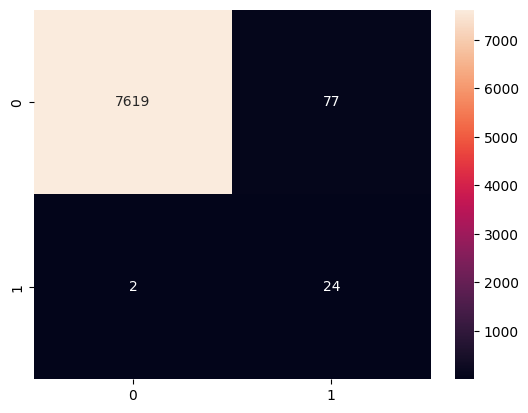

In [ ]:
lrS = LogisticRegression()
lrS.fit(x_train_res, y_train_res.ravel())
predictions = lrS.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))

cm1 = confusion_matrix(y_test ,predictions )
sns.heatmap(cm1 , annot=True ,fmt='g' )
plt.show()

after applying the Synthetic Minority Oversampling Technique algorithm we successfully improved our recall